# Taller de Análisis de Texto con Tweets en Español

Este taller guía a los estudiantes en el análisis de tweets en español, usando técnicas de limpieza de texto, análisis de frecuencia de palabras y análisis de sentimientos. También incluye preguntas orientadas al negocio.

In [13]:
!wget https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv

--2025-04-29 00:15:11--  https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv [following]
--2025-04-29 00:15:11--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205292 (200K) [text/plain]
Saving to: ‘Gender_bias_spanish.csv.1’

Gender_bias

## 1. Configuración e Importación de Librerías
Primero, importaremos las librerías necesarias y cargaremos el conjunto de datos.

In [14]:
!pip install nltk textblob wordcloud
import pandas as pd
import re
from nltk.corpus import stopwords
from textblob import TextBlob
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('spanish'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Cargar el Conjunto de Datos
Cargamos el archivo CSV que contiene los tweets y las etiquetas ('biased' o 'non-biased').

In [15]:

import pandas as pd
df = pd.read_csv('Gender_bias_spanish.csv')
print(df.head())


                                            Contents       Label
0  @chumeltorres ya cabrón! sin tí se reciben las...      biased
1  ¿alguien es tan amable de ir a hacerme la comp...  non-biased
2  @jenniferduquee hahaha, si está rico, nadamas ...  non-biased
3  @evagelcot donde lo ves!!? es mi programa favo...  non-biased
4  como siempre mi tortilla triunfa mas que otros...  non-biased


In [16]:
df.head()

,Contents,Label
0,@chumeltorres ya cabrón! sin tí se reciben las...,biased
1,¿alguien es tan amable de ir a hacerme la comp...,non-biased
2,"@jenniferduquee hahaha, si está rico, nadamas ...",non-biased
3,@evagelcot donde lo ves!!? es mi programa favo...,non-biased
4,como siempre mi tortilla triunfa mas que otros...,non-biased


## 2. Exploración de Datos
Exploraremos el conjunto de datos para entender mejor la distribución de etiquetas y las características de los tweets.

In [17]:
df['Label'].value_counts()


,count
Label,
non-biased,1596
biased,318


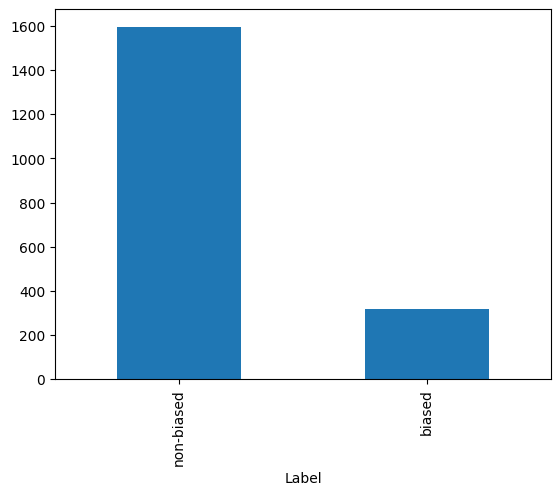

In [18]:
df['Label'].value_counts().plot(kind='bar')
plt.show()

**Pregunta:** ¿Qué proporción de tweets son 'biased' y 'non-biased'? ¿Por qué podría ser importante esta proporción para el análisis de texto?

In [34]:
Representación de la realidad: Una proporción desequilibrada podría indicar un sesgo en la muestra de datos, no reflejando la realidad o la distribución real de opiniones en la población objetivo.
Fiabilidad de los modelos: Si un modelo de análisis de texto se entrena con una proporción desequilibrada, podría tener un rendimiento deficiente al predecir la polaridad de tweets de la población real, donde la distribución de opiniones podría ser diferente.
Interpretación de resultados: La proporción debe considerarse al interpretar los resultados del análisis de sentimientos o cualquier otra métrica. Por ejemplo, si hay muchos más tweets 'biased', un resultado aparentemente positivo podría estar influenciado por esta mayor cantidad.
Necesidad de técnicas de balanceo:En caso de desequilibrio, se podrían aplicar técnicas de balanceo de datos para mejorar la precisión y la generalización de los modelos de Machine Learning, como submuestreo o sobremuestreo, asegurando que el modelo no se vea influenciado por la clase mayoritaria.


Proportion of biased tweets: 0.17
Proportion of non-biased tweets: 0.83

The proportion of biased vs. non-biased tweets is crucial for several reasons:
- **Model Training:** If the dataset is highly imbalanced (e.g., many more non-biased tweets), a model trained on this data might be biased towards predicting the majority class. This could lead to inaccurate predictions for biased tweets, which could be precisely what we are interested in detecting.
- **Performance Evaluation:** When evaluating a text analysis model, accuracy alone may be misleading with an imbalanced dataset. Metrics such as precision, recall, F1-score, or AUC-ROC provide a more comprehensive view of model performance across both classes.
- **Data Interpretation:**  Understanding the proportion helps in interpreting the results of text analysis. If there's a high proportion of biased tweets, the analysis might highlight topics or sentiments more relevant to that perspective.
- **Sampling Strategy:** If we need to crea

## 3. Preprocesamiento de Texto
Realizamos una serie de pasos para limpiar y preparar el texto para el análisis: limpieza de caracteres especiales, conversión a minúsculas, y eliminación de stopwords.

In [20]:
def limpiar_texto(texto):
    texto = texto.lower()
    texto = re.sub(r'[^\w\s]', '', texto)
    palabras = texto.split()
    palabras = [palabra for palabra in palabras if palabra not in stop_words]
    palabras = [palabra for palabra in palabras if len (palabra)> 4]


    return palabras

print(df.head())

                                            Contents       Label
0  @chumeltorres ya cabrón! sin tí se reciben las...      biased
1  ¿alguien es tan amable de ir a hacerme la comp...  non-biased
2  @jenniferduquee hahaha, si está rico, nadamas ...  non-biased
3  @evagelcot donde lo ves!!? es mi programa favo...  non-biased
4  como siempre mi tortilla triunfa mas que otros...  non-biased


In [21]:
df["tweets_clean"] = df["Contents"].apply(limpiar_texto)


In [22]:
df.head()

,Contents,Label,tweets_clean
0,@chumeltorres ya cabrón! sin tí se reciben las...,biased,"[chumeltorres, cabrón, reciben, noticias, colc..."
1,¿alguien es tan amable de ir a hacerme la comp...,non-biased,"[alguien, amable, hacerme, compra, mañana, baj..."
2,"@jenniferduquee hahaha, si está rico, nadamas ...",non-biased,"[jenniferduquee, hahaha, nadamas, falta, prese..."
3,@evagelcot donde lo ves!!? es mi programa favo...,non-biased,"[evagelcot, programa, favorito, encuentro, tem..."
4,como siempre mi tortilla triunfa mas que otros...,non-biased,"[siempre, tortilla, triunfa, platos, playa, ht..."


## 4. Análisis de Frecuencia de Palabras por Etiqueta
Contamos las palabras en tweets 'biased' y 'non-biased' y visualizamos las palabras más comunes.

In [23]:
tweets_biased = df[df['Label'] == 'biased']['tweets_clean']
tweets_non_biased = df[df['Label'] == 'non-biased']['tweets_clean']

In [24]:

all_words = []
for lst in df['tweets_clean']:
  all_words.extend(lst)


print(all_words)

all_words_2 = [word for sublist in df['tweets_clean'] for word in sublist]

print(all_words_2)


all_words_string = " ".join(all_words)
all_words_string


['chumeltorres', 'cabrón', 'reciben', 'noticias', 'colchoncito', 'chingadazo', 'extrañoreirconchumel', 'alguien', 'amable', 'hacerme', 'compra', 'mañana', 'bajón', 'antojos', 'httpstcoz5qc6tiobc', 'jenniferduquee', 'hahaha', 'nadamas', 'falta', 'presentación', 'evagelcot', 'programa', 'favorito', 'encuentro', 'temporada', 'vistos', 'siempre', 'tortilla', 'triunfa', 'platos', 'playa', 'httpstcoc60tc2teqv', 'quiero', 'alguien', 'conmigo', 'cumple', 'felices', 'pvaya', 'sailor_tesserei', 'sh3rrymh', 'reivindicación', 'sabes', 'gente', 'pedante', 'eneneroyo', 'pendiente', 'familia', 'pendiente', 'mensajes', 'pequeños', 'amores', 'yolanday_y', 'el_pais', '72000', 'viaje', 'conformate', 'moléculas', 'potasio', 'buenas', 'pocas', 'maneras', 'mejores', 'ocurren', 'empezar', 'semana', 'httpstcop5woxm5ffl', 'soyalannavarro', 'buenas', 'noches', 'risitas', 'sueña', 'bonito', 'she_ra_h', 'darinasilver', 'hecho', 'pixie', 'quedan', 'chidos', 'quise', 'recortarlo', 'error', 'esperaba', 'encontrar', 

'chumeltorres cabrón reciben noticias colchoncito chingadazo extrañoreirconchumel alguien amable hacerme compra mañana bajón antojos httpstcoz5qc6tiobc jenniferduquee hahaha nadamas falta presentación evagelcot programa favorito encuentro temporada vistos siempre tortilla triunfa platos playa httpstcoc60tc2teqv quiero alguien conmigo cumple felices pvaya sailor_tesserei sh3rrymh reivindicación sabes gente pedante eneneroyo pendiente familia pendiente mensajes pequeños amores yolanday_y el_pais 72000 viaje conformate moléculas potasio buenas pocas maneras mejores ocurren empezar semana httpstcop5woxm5ffl soyalannavarro buenas noches risitas sueña bonito she_ra_h darinasilver hecho pixie quedan chidos quise recortarlo error esperaba encontrar boleto partido spurs arbolito mantendría keegs insta troian cosas sabéis kiwiliberal confundes conceptos nivel medidas sociales socialismo buenas noches mañana madruga buenos dulce gracias sonríe gracias crece aprende besitos igual tiburón jaula úni

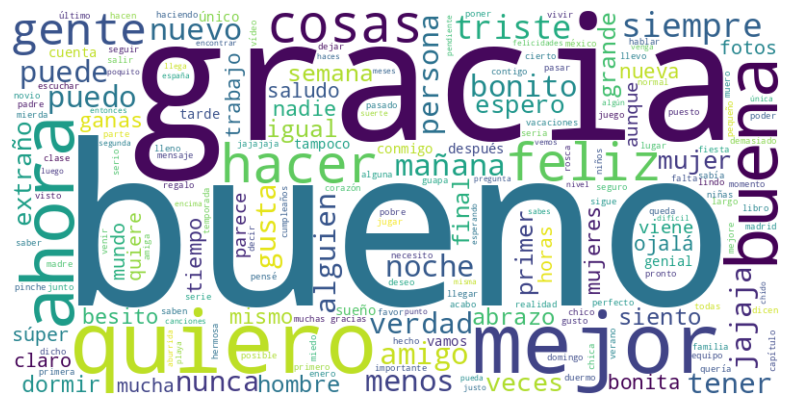

In [31]:

import matplotlib.pyplot as plt
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words_string)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


**Preguntas de Análisis de Frecuencia:**
- ¿Qué palabras son más comunes en los tweets 'biased' en comparación con los 'non-biased'?
- ¿Hay palabras que sugieran un sesgo en los tweets etiquetados como 'biased'?
- ¿Cómo podrían usar las empresas esta información para entender mejor las opiniones sesgadas?

In [36]:

 1. Monitoreo de la reputación de la marca: Identificar palabras clave asociadas con críticas sesgadas para entender mejor las percepciones negativas.
 2. Análisis de campañas de marketing: Evaluar la efectividad de las campañas publicitarias, identificando posibles sesgos en la respuesta del público.
 3.  Detección temprana de problemas:  Monitorear las redes sociales para identificar temas o palabras clave con sesgos negativos que puedan afectar a la empresa.
 4.  Mejora del servicio al cliente: Identificar patrones de lenguaje que revelan insatisfacción o sesgo en las interacciones con clientes para enfocar las mejoras en el servicio al cliente.
 5.  Segmentación de clientes: Agrupar clientes según los sesgos expresados en sus opiniones para adaptar los mensajes y productos de manera personalizada.


Palabras más comunes en tweets 'biased': [('mujer', 23), ('mujeres', 19), ('quiero', 14), ('mejor', 13), ('cosas', 10), ('niñas', 10), ('chicas', 9), ('hombres', 9), ('ahora', 8), ('bonita', 8)]

Palabras más comunes en tweets 'non-biased': [('gracias', 90), ('quiero', 62), ('mejor', 62), ('feliz', 50), ('ahora', 47), ('hacer', 46), ('bueno', 43), ('cosas', 42), ('siempre', 40), ('gente', 40)]

Palabras que aparecen solo en tweets con sesgo: ['adaptar', 'dados', 'retratados', 'jajajajajajajjaajaja', 'liamverse', 'guapas', 'acorde', 'rlegaz', 'etiquetar', 'jajsakjkjsadjjsjasjajaja']


## 5. Análisis de Sentimientos
Usaremos `TextBlob` para calcular el sentimiento de cada tweet y luego compararemos la distribución de sentimientos entre tweets 'biased' y 'non-biased'.

In [32]:
def analizar_sentimiento(texto):
    blob = TextBlob(texto)
    return blob.sentiment.polarity

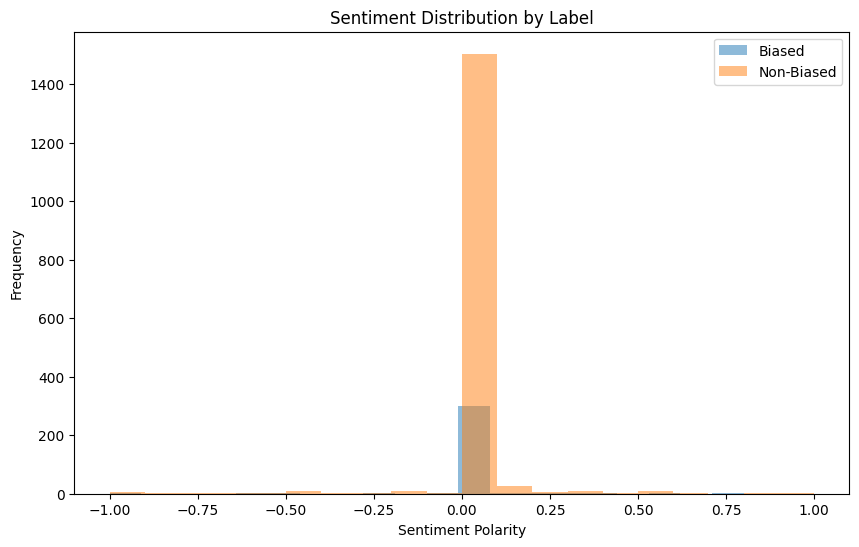

Average sentiment for biased tweets: 0.0012316561844863737
Average sentiment for non-biased tweets: 0.001848561855463877


In [33]:

import matplotlib.pyplot as plt

df['sentiment'] = df['Contents'].apply(analizar_sentimiento)

biased_sentiments = df[df['Label'] == 'biased']['sentiment']
non_biased_sentiments = df[df['Label'] == 'non-biased']['sentiment']

plt.figure(figsize=(10, 6))
plt.hist(biased_sentiments, bins=20, alpha=0.5, label='Biased')
plt.hist(non_biased_sentiments, bins=20, alpha=0.5, label='Non-Biased')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.title('Sentiment Distribution by Label')
plt.legend(loc='upper right')
plt.show()

avg_biased_sentiment = biased_sentiments.mean()
avg_non_biased_sentiment = non_biased_sentiments.mean()

print(f"Average sentiment for biased tweets: {avg_biased_sentiment}")
print(f"Average sentiment for non-biased tweets: {avg_non_biased_sentiment}")



**Preguntas de Análisis de Sentimientos:**
- ¿Existe una diferencia notable en los sentimientos de tweets 'biased' vs 'non-biased'?
- ¿Qué indica esta diferencia sobre la naturaleza de los tweets sesgados?
- ¿Cómo podrías aplicar el análisis de sentimientos para entender la percepción del público sobre un tema específico?

In [ ]:

 1. Diferencia notable en los sentimientos:
 Para responder a esta pregunta, se debe analizar la salida del código proporcionado, específicamente las variables `avg_biased_sentiment` y `avg_non_biased_sentiment`, así como los histogramas generados.  Si existe una diferencia significativa en las medias de sentimiento (positiva o negativa), y se observa una clara separación en las distribuciones de los histogramas, se puede concluir que sí existe una diferencia notable.  En caso contrario, si los valores son similares y los histogramas se superponen significativamente, la diferencia no sería tan notable.


 2. Qué indica la diferencia sobre la naturaleza de los tweets sesgados:
 La diferencia en el sentimiento indica la tendencia emocional expresada en los tweets etiquetados como sesgados. Por ejemplo, si los tweets sesgados tienen una polaridad significativamente más negativa, sugiere que el sesgo se manifiesta a través de emociones negativas, críticas o ataques. Si es más positiva, podría implicar sesgo a través de una exaltación desproporcionada o la promoción de una visión específica con un tono entusiasta.  Observar la dirección y la magnitud de la diferencia nos da pistas sobre la dirección del sesgo.


 3. Aplicación del análisis de sentimientos para entender la percepción del público:
El análisis de sentimiento se puede aplicar para medir la percepción del público sobre un tema específico de las siguientes maneras:

Monitoreo de la opinión pública:** Al analizar un gran volumen de tweets (o publicaciones en otras redes sociales) relacionados con un tema en particular, se puede detectar la tendencia general del sentimiento (positivo, negativo o neutra
Identificación de problemas potenciales:** Los sentimientos negativos o un aumento en la negatividad pueden alertar sobre posibles problemas, controversias o crisis que estén afectando la percepción pública de un tema, producto o marca.
Segmentación del público:** El análisis de sentimientos puede usarse para segmentar audiencias basándose en sus opiniones, permitiendo a las empresas o entidades adaptar sus mensajes a distintos grupos.
*Evaluación de campañas:** Se pueden comparar los sentimientos antes, durante y después de una campaña para evaluar su impacto en la percepción pública.
Comparación de diferentes grupos:** Se puede comparar el sentimiento de distintos grupos demográficos o con diferentes características para comprender mejor las diferencias de opinión.


 el análisis de sentimientos proporciona una manera cuantitativa y cualitativa de analizar las emociones y opiniones expresadas sobre un tema, lo que permite obtener insights valiosos para la toma de decisiones en diferentes contextos.


## 6. Visualización con Nube de Palabras
Usamos una nube de palabras para visualizar las palabras más comunes en cada conjunto de tweets.

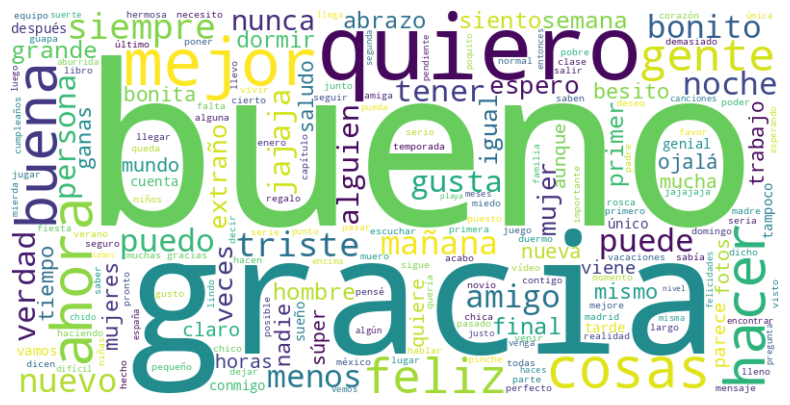

In [29]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

word_counts = Counter(all_words)
most_common_words = word_counts.most_common(10)

words = [word for word, count in most_common_words]
counts = [count for word, count in most_common_words]

## 7. Conclusiones y Perspectiva de Negocios
En este taller, hemos explorado cómo el análisis de texto puede ofrecer información valiosa sobre el contenido y el sentimiento de los tweets. Reflexionemos sobre algunas preguntas de negocio:
- ¿Cómo podría utilizarse este análisis para mejorar la comunicación de la marca?
- ¿Qué ajustes se podrían hacer en una campaña de marketing si los tweets son predominantemente 'biased'?
- ¿Qué patrones importantes se podrían explorar en un análisis futuro (e.g., análisis de tendencias a lo largo del tiempo)?